# Palpitando Qatar 2022 - _International Matches_

El dataset utilizado en este notebook corresponde a todos los partidos de fútbol disputados entre selecciones nacionales desde el 08/08/1993 al 14/06/2022.

### Índice:

#### 1. Discusiones domingueras

- 1.1 - ¿El local tiene ventaja? - Gráfico que compara los partidos ganados por el equipo local, el visitante, y los empates. ¿En qué porcentaje de los partidos celebrados salió victorioso el equipo local?
- 1.2 - Resultados esperados según ranking FIFA - Gráfico de la cantidad de partidos ganados por el equipo esperado según el ranking de la FIFA y los "batacazos".

#### 2. Un poco de historia

- 2.1. - Sudamérica vs Europa - H2H entre naciones sudamericanas y europeas. 
- 2.2. - Argentina vs Brasil, el superclásico americano - H2H entre Argentina y Brasil.
- 2.3. - Una vez más - H2H entre Argentina y las naciones que integran el grupo C de Qatar 2022.
- 2.4. - Que la gente crea - Porcentaje de victorias de Argentina a lo largo de los años.

#### 3. Bonus

- 3.1. - Los goleadores - Top 10 de las selecciones con mayor promedio de gol en mundiales
- 3.2. - El No-Top 10 - Las 10 selecciones que más...
- 3.3. - Algunos datos del anfitrión 

In [617]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator

In [618]:
df = pd.read_csv("international_matches.csv", parse_dates=["date"])

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

In [620]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

Elimino las columnas irrelevantes para el análisis

In [621]:
df = df[df.columns[:17]]
df = df.drop(["home_team_total_fifa_points", "away_team_total_fifa_points", "city"], axis=1)

Creo una nueva columna con el resultado del partido para el equipo visitante

In [622]:
df["away_team_result"]= "Win"
df.loc[(df["home_team_result"] == "Win"), "away_team_result"] = "Lose"
df.loc[(df["home_team_result"] == "Draw"), "away_team_result"] = "Draw"

## 1. Discusiones domingueras

### 1.1. _¿El local tiene ventaja?_

__¿Es verdad que el equipo local tiene más chances de ganar un partido?.__

Para este paso, elimino los partidos con sede neutral

In [623]:
dfA = df.loc[(df["neutral_location"] == False)]

Obtengo victorias, derrotas y empates respecto de los equipos locales

In [624]:
victorias = dfA.loc[(dfA["home_team_result"] == "Win"), "country"].count()
derrotas = dfA.loc[(dfA["home_team_result"] == "Lose"), "country"].count()
empates = dfA.loc[(dfA["home_team_result"] == "Draw"), "country"].count()

Grafico la cantidad de victorias, derrotas y empates respecto de los equipos locales

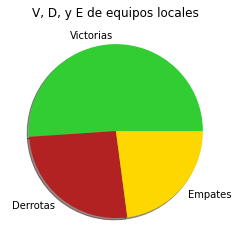

In [625]:
x = ["Victorias", "Derrotas","Empates"]
y = [victorias, derrotas, empates]
plt.pie(y, labels=x,colors= ["limegreen", "firebrick", "gold"], shadow=True)
plt.title("V, D, y E de equipos locales")
plt.show()


Conclusiones

In [626]:
ca= (victorias/(victorias+derrotas+empates)*100).round(1)
cb= (derrotas/(victorias+derrotas+empates)*100).round(1)
cc= (empates/(victorias+derrotas+empates)*100).round(1)
print(f"De todos los partidos jugados en sede no neutral, el equipo local ganó el {ca}% de las veces, perdió el {cb}% y empató el {cc}%.")

De todos los partidos jugados en sede no neutral, el equipo local ganó el 51.1% de las veces, perdió el 26.0% y empató el 22.9%.


### 1.2. _Resultados esperados según ranking FIFA_

__Si intentáramos predecir el resultado de los partidos internacionales basándonos únicamente en la posición en el ranking FIFA de los equipos adversarios, ¿qué tan acertado sería nuestro pronóstico?.__

Descarto los empates

In [627]:
dfB = df[df["home_team_result"] != "Draw"]

También descarto aquellos partidos donde los participantes tenían el mismo ranking

In [628]:
dfB = dfB[dfB["home_team_fifa_rank"] != dfB["away_team_fifa_rank"]]

Obtengo resultados esperados e inesperados

In [629]:
Vesp= dfB.loc[(dfB["home_team_fifa_rank"] > dfB["away_team_fifa_rank"]) & (dfB["home_team_result"] == "Win"), "date"].count()
Desp= dfB.loc[(dfB["home_team_fifa_rank"] < dfB["away_team_fifa_rank"]) & (dfB["home_team_result"] == "Lose"), "date"].count()
Vinesp= dfB.loc[(dfB["home_team_fifa_rank"] < dfB["away_team_fifa_rank"]) & (dfB["home_team_result"] == "Win"), "date"].count()
Dinesp= dfB.loc[(dfB["home_team_fifa_rank"] > dfB["away_team_fifa_rank"]) & (dfB["home_team_result"] == "Lose"), "date"].count()
Resp= Vesp+Desp
Rinesp= Vinesp+Dinesp

Grafico la cantidad de resultados esperados e inesperados

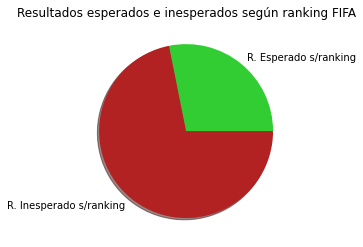

In [630]:
x = ["R. Esperado s/ranking", "R. Inesperado s/ranking"]
y = [Resp, Rinesp]
plt.pie(y, labels=x, colors=["limegreen", "firebrick"], shadow=True)
plt.title("Resultados esperados e inesperados según ranking FIFA")
plt.show()

Conclusiones

In [631]:
cd = (Resp*100/(Resp+Rinesp)).round(2)
print(f"Si hubieramos pronosticado el resultado de cada partido (victoria o derrota) considerando la posición de los equipos en el ranking FIFA, habríamos acertado únicamente el {cd}% de las veces, sin considerar aquellos que terminaron en empate.")

Si hubieramos pronosticado el resultado de cada partido (victoria o derrota) considerando la posición de los equipos en el ranking FIFA, habríamos acertado únicamente el 28.15% de las veces, sin considerar aquellos que terminaron en empate.


## 2. Un poco de historia

### 2.1. _Sudamérica vs Europa, la batalla intercontinental_

__H2H entre selecciones sudamericanas y europeas.__

Selecciono los partidos entre selecciones sudamericanas y europeas

In [632]:
dfC = df.loc[((df["home_team_continent"] == "South America") & (df["away_team_continent"] == "Europe"))  | ((df["home_team_continent"] == "Europe") & (df["away_team_continent"] == "South America"))]

Conteo de partidos ganados por continente y empates

In [633]:
partidos_totales = dfC["date"].count()
victorias_sudam = dfC.loc[((dfC["home_team_continent"] == "South America") & (dfC["home_team_result"] == "Win")) | ((dfC["away_team_continent"] == "South America") & (dfC["away_team_result"] == "Win")), "date"].count()
victorias_europa = dfC.loc[((dfC["home_team_continent"] == "Europe") & (dfC["home_team_result"] == "Win")) | ((dfC["away_team_continent"] == "Europe") & (dfC["away_team_result"] == "Win")), "date"].count()
empates = dfC.loc[df["home_team_result"]=="Draw", "date"].count()

Grafico victorias por continente y empates

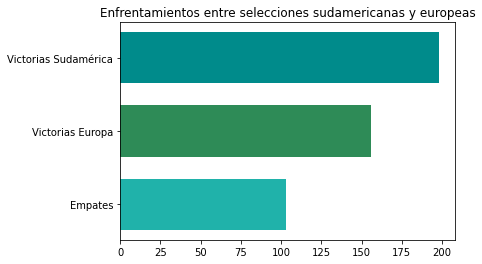

In [634]:
y = ["Victorias Sudamérica", "Victorias Europa", "Empates"]
y = list(reversed(y))
x=[victorias_sudam,victorias_europa,empates]
x= list(reversed(x))
plt.barh(y,x, height=0.7,color= ["lightseagreen", "seagreen", "darkcyan"])
plt.title("Enfrentamientos entre selecciones sudamericanas y europeas")
plt.show()

Ahora sin considerar amistosos

In [635]:
dfD = dfC.loc[df["tournament"] != "Friendly"]

In [636]:
partidos_totalesD = dfD["date"].count()
victorias_sudamD = dfD.loc[((dfD["home_team_continent"] == "South America") & (dfD["home_team_result"] == "Win")) | ((dfD["away_team_continent"] == "South America") & (dfD["away_team_result"] == "Win")), "date"].count()
victorias_europaD = dfD.loc[((dfC["home_team_continent"] == "Europe") & (dfD["home_team_result"] == "Win")) | ((dfD["away_team_continent"] == "Europe") & (dfD["away_team_result"] == "Win")), "date"].count()
empatesD = dfD.loc[df["home_team_result"]=="Draw", "date"].count()

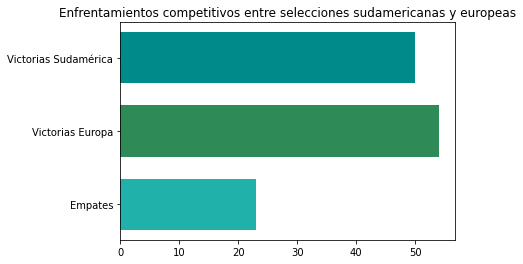

In [637]:
yD = ["Victorias Sudamérica", "Victorias Europa", "Empates"]
yD = list(reversed(yD))
xD=[victorias_sudamD,victorias_europaD,empatesD]
xD= list(reversed(xD))
plt.barh(yD,xD, height=0.7,color= ["lightseagreen", "seagreen", "darkcyan"])
plt.title("Enfrentamientos competitivos entre selecciones sudamericanas y europeas")
plt.show()

Conclusiones

In [638]:
print(f"De los enfrentamientos entre selecciones europeas y sudamericanas desde 1993 hasta la fecha, los equipos sudamericanos salieron victoriosos en más encuentros ({victorias_sudam}) que los europeos ({victorias_europa}). Sin embargo, excluyendo los partidos amistosos concluimos que el continente europeo se impuso en más ocasiones ({victorias_europaD} vs {victorias_sudamD}).")

De los enfrentamientos entre selecciones europeas y sudamericanas desde 1993 hasta la fecha, los equipos sudamericanos salieron victoriosos en más encuentros (198) que los europeos (156). Sin embargo, excluyendo los partidos amistosos concluimos que el continente europeo se impuso en más ocasiones (54 vs 50).


### 2.2. _El superclásico americano_

__H2H entre Argentina y Brasil.__

Selecciono los partidos disputados entre Argentina y Brasil

In [639]:
dfH = df.loc[((df["home_team"] == "Argentina")&(df["away_team"] == "Brazil")) | ((df["home_team"] == "Brazil")&(df["away_team"] == "Argentina"))]
dfH = dfH.loc[dfH["tournament"]!="Friendly"]

Calculo las victorias de cada selección y los empates

In [640]:
Varg = dfH.loc[((dfH["home_team"] == "Argentina")&(dfH["home_team_result"] == "Win")) | ((dfH["away_team"]=="Argentina")&(dfH["away_team_result"]=="Win")), "tournament"].count()
Vbrz = dfH.loc[((dfH["home_team"] == "Brazil")&(dfH["home_team_result"] == "Win")) | ((dfH["away_team"]=="Brazil")&(dfH["away_team_result"]=="Win")), "tournament"].count()
EmpatesB = dfH.loc[dfH["home_team_result"]=="Draw", "tournament"].count()
AvsB = Varg+Vbrz+EmpatesB

Grafico la información anterior

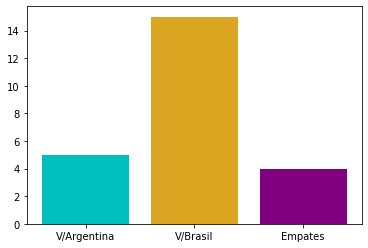

In [641]:
xC = ["V/Argentina", "V/Brasil", "Empates"]
yC = [Varg, Vbrz, EmpatesB]
plt.bar(xC,yC, color=["c","goldenrod","purple"])
plt.show()

Conclusiones

In [642]:
print(f"De 1993 a la fecha y sin considerar partidos amistosos, se celebraron {AvsB} partidos entre Argentina y Brasil, de los cuales {Varg} fueron ganados por Argentina, mientras que la verde-amarela se quedó con {Vbrz} encuentros. El resto fueron empates.")

De 1993 a la fecha y sin considerar partidos amistosos, se celebraron 24 partidos entre Argentina y Brasil, de los cuales 5 fueron ganados por Argentina, mientras que la verde-amarela se quedó con 15 encuentros. El resto fueron empates.


### 2.3. _Una vez más_

__Un vistazo al historial con las selecciones que acompañan a Argentina en el grupo C de Qatar 2022.__

In [643]:
df.loc[((df["home_team"] == "Argentina")&(df["away_team"] == "Poland")) | ((df["home_team"] == "Poland")&(df["away_team"] == "Argentina"))]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,country,neutral_location,shoot_out,home_team_result,away_team_result
14024,2011-06-05,Poland,Argentina,Europe,South America,71,5,2,1,Friendly,Poland,False,No,Win,Lose


In [644]:
df.loc[((df["home_team"] == "Argentina")&(df["away_team"] == "Saudi Arabia")) | ((df["home_team"] == "Saudi Arabia")&(df["away_team"] == "Argentina"))]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,country,neutral_location,shoot_out,home_team_result,away_team_result
15531,2012-11-14,Saudi Arabia,Argentina,Asia,South America,112,3,0,0,Friendly,Saudi Arabia,False,No,Draw,Draw


In [645]:
dfM = df.loc[((df["home_team"] == "Argentina")&(df["away_team"] == "Mexico")) | ((df["home_team"] == "Mexico")&(df["away_team"] == "Argentina"))]
Varg2 = dfM.loc[((dfM["home_team"] == "Argentina")&(dfM["home_team_result"] == "Win")) | ((dfM["away_team"]=="Argentina")&(dfM["away_team_result"]=="Win")), "tournament"].count()
Vmex = dfM.loc[((dfM["home_team"] == "Mexico")&(dfM["home_team_result"] == "Win")) | ((dfM["away_team"]=="Mexico")&(dfM["away_team_result"]=="Win")), "tournament"].count()
EmpatesM = dfM.loc[dfM["home_team_result"]=="Draw", "tournament"].count()
AvsM = Varg2+Vmex+EmpatesM

In [646]:
print(f"Argentina enfrentó a Polonia y Arabia Saudita sólo una vez, ambos partidos fueron amistosos. Contra la selección europea caímos por 2 a 1 en el 2011, y contra Arabia empatamos 0 a 0 en 2012. Por otro lado, enfrentamos a México en {AvsM} ocasiones, resultando ganadores en {Varg2} partidos, perdedores en {Vmex} y {EmpatesM} empates.")

Argentina enfrentó a Polonia y Arabia Saudita sólo una vez, ambos partidos fueron amistosos. Contra la selección europea caímos por 2 a 1 en el 2011, y contra Arabia empatamos 0 a 0 en 2012. Por otro lado, enfrentamos a México en 15 ocasiones, resultando ganadores en 11 partidos, perdedores en 1 y 3 empates.


### 2.4. _Que la gente crea_

__Porcentaje de partidos ganados por Argentina año a año.__

Creo una columna con el año del partido

In [647]:
dfF = df.set_index("date")
dfF["year"] = dfF.index.year

Descarto los partidos jugados en 1993 porque ese año tiene información incompleta

In [648]:
dfF = dfF.loc[(dfF["year"] != 1993)]

Selecciono únicamente los partidos donde participó Argentina

In [649]:
dfF = dfF.loc[(dfF["home_team"] == "Argentina") | (dfF["away_team"] == "Argentina")]

Creo tres listas: Victorias, Derrotas y Empates por año

In [650]:
x = 1994
listaV= []
listaD = []
listaE = []
años =[]
while x<2023:
    V = dfF.loc[(dfF["year"] == x) & (((dfF["home_team"] == "Argentina") & (dfF["home_team_result"] == "Win")) | ((dfF["away_team"] =="Argentina") & (dfF["away_team_result"]=="Win"))), "tournament"].count()
    D = dfF.loc[(dfF["year"] == x) & (((dfF["home_team"] == "Argentina") & (dfF["home_team_result"] == "Lose")) | ((dfF["away_team"] =="Argentina") & (dfF["away_team_result"]=="Lose"))), "tournament"].count()
    E = dfF.loc[(dfF["year"] == x) & (((dfF["home_team"] == "Argentina") & (dfF["home_team_result"] == "Draw")) | ((dfF["away_team"] =="Argentina") & (dfF["away_team_result"]=="Draw"))), "tournament"].count()
    listaV.append(V)
    listaD.append(D)
    listaE.append(E)
    años.append(x)
    x=x+1

Creo un dataframe con la información anterior

In [651]:
dfG = pd.DataFrame(index=años, columns=["jugados","ganados","perdidos","empatados"])

In [652]:
dfG["ganados"] = listaV
dfG["perdidos"] = listaD
dfG["empatados"] = listaE
dfG["jugados"] = dfG["empatados"]+dfG["perdidos"]+dfG["ganados"] 

Calculo el porcentaje de victorias, derrotas y empates por año

In [653]:
porcentajeG=((dfG["ganados"]/dfG["jugados"])*100).round(2)
porcentajeE=((dfG["empatados"]/dfG["jugados"])*100).round(2)
porcentajeD=((dfG["perdidos"]/dfG["jugados"])*100).round(2)

Grafico la información anterior

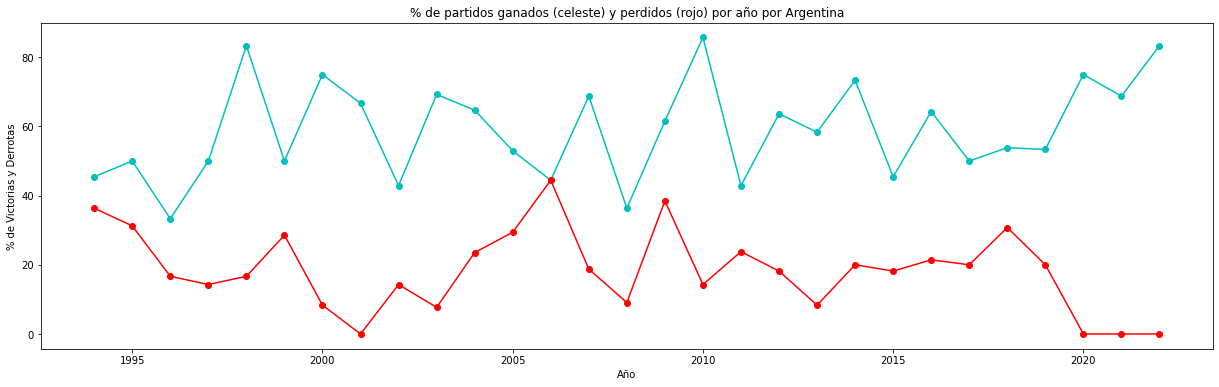

In [654]:
fig, ax= plt.subplots(figsize=(21,6))
ax.plot(porcentajeG,color="c", marker="o")
ax.plot(porcentajeD,color="r", marker="o")
ax.set(xlabel="Año", ylabel="% de Victorias y Derrotas", title="% de partidos ganados (celeste) y perdidos (rojo) por año por Argentina")
plt.show()

In [655]:
M = max(porcentajeG)

Conclusiones

In [656]:
print(f"Entre 1994 y 2021, la selección argentina nunca perdió más partidos de los que ganó en un año; fue invicto en el 2001, 2020 (año de pandemia), y 2021; alcanzó en el 2010 la tasa de victorias máxima de {M}%. De tener una buena performance en Qatar 2022 y los amistosos previos, la Scaloneta puede llegar a superar esta estadística.")

Entre 1994 y 2021, la selección argentina nunca perdió más partidos de los que ganó en un año; fue invicto en el 2001, 2020 (año de pandemia), y 2021; alcanzó en el 2010 la tasa de victorias máxima de 85.71%. De tener una buena performance en Qatar 2022 y los amistosos previos, la Scaloneta puede llegar a superar esta estadística.


## 3. Bonus

### 3.1. _Los goleadores_

__Top 10 de selecciones con mayor promedio de gol en mundiales.__

Selecciono sólo los partidos de mundiales

In [657]:
dfG= df.loc[df["tournament"]=="FIFA World Cup"]

Hago una lista de los países que participaron. (Utilizo la columna de "away_team" porque, luego de haberlo chequeado, sé que incluye más países que la columna de locales, y también que todos los que están incluidos en ésta última también lo están en la primera).

In [658]:
paisesG = list(dict(dfG["away_team"].value_counts()).keys())

Sumo los partidos y goles por país, y luego calculo el promedio de gol para cada uno

In [659]:
l = []
for p in paisesG:
    goles = (dfG.loc[(dfG["home_team"]==p), "home_team_score"].sum() + dfG.loc[(dfG["away_team"]==p), "away_team_score"].sum())
    partidos = dfG.loc[(dfG["home_team"]==p), "home_team"].count() + dfG.loc[(dfG["away_team"]==p), "home_team"].count()
    promedio_gol= round(goles/partidos, 2)
    l.append(promedio_gol)
dic = dict(zip(paisesG,l))

Selecciono los 10 países con mayor promedio

In [660]:
dic_ord= sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
dic_10 = dict(dic_ord[0:10])

Grafico la información anterior

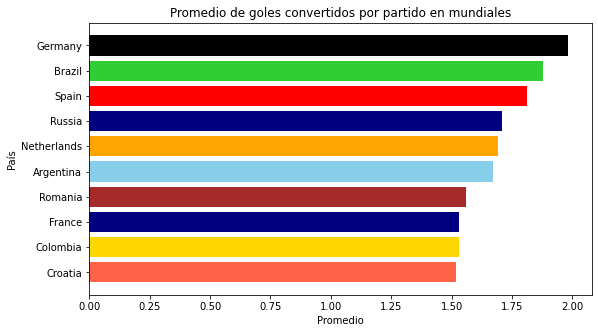

In [681]:
fig, ax= plt.subplots(figsize=(9,5))
xG = list(reversed(dic_10.values()))
yG = list(reversed(dic_10.keys()))
plt.barh(yG,xG, color=["tomato","gold","navy","brown","skyblue","orange","navy","r","limegreen","black"])
ax.set(xlabel="Promedio", ylabel="País", title="Promedio de goles convertidos por partido en mundiales")
plt.show()

Conclusiones

In [662]:
print(f"El país con mayor promedio de gol en mundiales desde USA 1994 es Alemania con un promedio de {xG[9]} goles por partido. Lo sigue Brasil con {xG[8]}. Argentina está 6to con {xG[4]} goles por partido.")

El país con mayor promedio de gol en mundiales desde USA 1994 es Alemania con un promedio de 1.98 goles por partido. Lo sigue Brasil con 1.88. Argentina está 6to con 1.67 goles por partido.


### 3.2. _El No-Top 10_

__3.2.1. Los 10 mundialistas que más goles reciben en competencias oficiales.__ 

Descarto los amistosos

In [663]:
dfN= df.loc[df["tournament"]!="Friendly"]

Hago un diccionario con cada país y su respectivo promedio de goles recibidos

In [664]:
lN = []
for p in paisesG:
    golesR = dfN.loc[(dfN["home_team"]==p), "away_team_score"].sum() + dfN.loc[(dfN["away_team"]==p), "home_team_score"].sum()
    partidos = dfN.loc[(dfN["home_team"]==p), "home_team"].count() + dfN.loc[(dfN["away_team"]==p), "away_team"].count()
    promedio_golR= round(golesR/partidos, 2)
    lN.append(promedio_golR)
    
dicN = dict(zip(paisesG, lN))

Tomo los 10 países que tienen mayor promedio de goles en contra y los grafico

In [665]:
dic_ordN= sorted(dicN.items(), key=operator.itemgetter(1),reverse=True)
dic_10N = dict(dic_ordN[0:10])

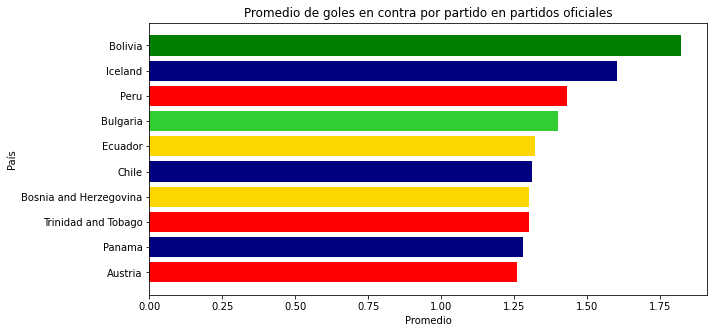

In [686]:
fig, ax= plt.subplots(figsize=(10,5))
xN = list(reversed(dic_10N.values()))
yN = list(reversed(dic_10N.keys()))
plt.barh(yN,xN, color=["r","navy","r","gold","navy","gold","limegreen","r","navy","g"])
ax.set(xlabel="Promedio", ylabel="País", title="Promedio de goles en contra por partido en partidos oficiales")
plt.show()

Conclusiones

In [667]:
print(f"En competencias oficiales, la selección mundialista con mayor promedio de goles en contra es Bolivia con {xN[9]} por partido. Le siguen Islandia y Perú con, respectivamente, {xN[8]} y {xN[7]}.")

En competencias oficiales, la selección mundialista con mayor promedio de goles en contra es Bolivia con 1.82 por partido. Le siguen Islandia y Perú con, respectivamente, 1.6 y 1.43.


__3.2.2. Las 10 selecciones que más goles reciben en competencias oficiales.__ 

Hago una lista con todos los países

In [668]:
paisesM = list(dict(df["away_team"].value_counts()).keys())

Hago un diccionario con cada país y su respectivo promedio de goles en contra

In [669]:
lM = []
for p in paisesM:
    golesRe = dfN.loc[(dfN["home_team"]==p), "away_team_score"].sum() + dfN.loc[(dfN["away_team"]==p), "home_team_score"].sum()
    partidos = dfN.loc[(dfN["home_team"]==p), "home_team"].count() + dfN.loc[(dfN["away_team"]==p), "away_team"].count()
    promedio_golRe= round(golesRe/partidos, 2)
    lM.append(promedio_golRe)
    
dicM = dict(zip(paisesM, lM))

Tomo los 10 con mayor promedio y grafico

In [670]:
dic_ordM= sorted(dicM.items(), key=operator.itemgetter(1),reverse=True)
dic_10M = dict(dic_ordM[0:10])

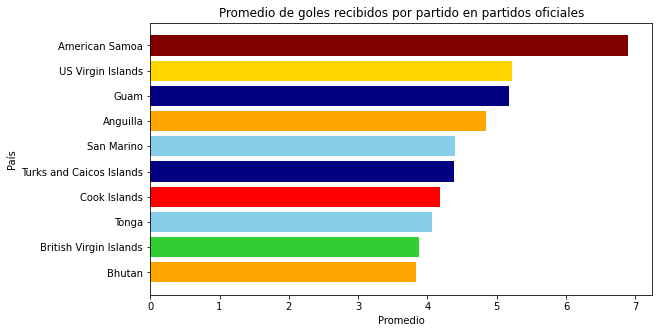

In [689]:
fig, ax= plt.subplots(figsize=(9,5))
xM = list(reversed(dic_10M.values()))
yM = list(reversed(dic_10M.keys()))
plt.barh(yM,xM, color=["orange","limegreen","skyblue","red","navy","skyblue","orange","navy","gold","maroon"])
ax.set(xlabel="Promedio", ylabel="País", title="Promedio de goles recibidos por partido en partidos oficiales")
plt.show()

Conclusiones

In [690]:
print(f"{yM[9]} es, por lejos, el país más goleado. Recibe {xM[9]} goles por partido. Lo siguen {yM[8]} y {yM[7]} con {xM[8]} y {xM[7]} goles en contra, respectivamente.")

American Samoa es, por lejos, el país más goleado. Recibe 6.9 goles por partido. Lo siguen US Virgin Islands y Guam con 5.22 y 5.17 goles en contra, respectivamente.


__3.2.3. El mundialista más perdedor.__ 

Hago un diccionario con cada país y su respectivo porcentaje de derrotas

In [691]:
lT = []
for p in paisesG:
    derrotas = dfN.loc[(dfN["home_team"]==p) & (dfN["home_team_result"]=="Lose"), "country"].count() + dfN.loc[(dfN["away_team"]==p) & (dfN["away_team_result"]=="Lose"), "country"].count()
    partidos = dfN.loc[(dfN["home_team"]==p), "home_team"].count() + dfN.loc[(dfN["away_team"]==p), "away_team"].count()
    promedioD= round((derrotas/partidos)*100, 2)
    lT.append(promedioD)
dicT = dict(zip(paisesG, lT))

Reduzco la lista y selecciono al que tiene mayor porcentaje

In [692]:
dic_ordT= sorted(dicT.items(), key=operator.itemgetter(1), reverse=True)
dic_10T = dict(dic_ordT[0:10])
xT = list(dic_10T.values())
yT = list(dic_10T.keys())
porc = xT[0]
loser = yT[0]

Conclusiones

In [693]:
print(f"El más perdedor es {loser}, con {porc}% de partidos perdidos en competencias oficiales. El {100-porc}% restante está distribuido en empates y victorias.")

El más perdedor es Bolivia, con 56.45% de partidos perdidos en competencias oficiales. El 43.55% restante está distribuido en empates y victorias.


### 3.3 _Algunos datos del anfitrión_

Selecciono únicamente los partiods oficiales en los que participó Qatar

In [694]:
dfQ = df.loc[(df["home_team"]=="Qatar")|(df["away_team"]=="Qatar")]
dfQ = dfQ.loc[dfQ["tournament"]!="Friendly"]

Calculo la cantidad de victorias, derrotas, empates y goles convertidos

In [695]:
VQ = dfQ.loc[(dfQ["home_team"]=="Qatar")&(dfQ["home_team_result"]=="Win"), "country"].count() + dfQ.loc[((dfQ["away_team"]=="Qatar")&(dfQ["home_team_result"]=="Lose")), "country"].count()
DQ = dfQ.loc[(dfQ["home_team"]=="Qatar")&(dfQ["home_team_result"]=="Lose"), "country"].count() + dfQ.loc[((dfQ["away_team"]=="Qatar")&(dfQ["home_team_result"]=="Win")), "country"].count()
EQ = dfQ.loc[(dfQ["home_team"]=="Qatar")&(dfQ["home_team_result"]=="Draw"), "country"].count() + dfQ.loc[((dfQ["away_team"]=="Qatar")&(dfQ["home_team_result"]=="Draw")), "country"].count()
PQ = VQ+DQ+EQ
golQ= dfQ.loc[(dfQ["home_team"]=="Qatar"), "home_team_score"].sum() + dfQ.loc[(dfQ["away_team"]=="Qatar"), "away_team_score"].sum()

¿Qatar jugó algún mundial?

In [696]:
"Qatar" in paisesG

False

Conclusiones

In [697]:
print(f"En su historia, Qatar disputó {PQ} encuentros oficiales, de los cuales: ganó {VQ}, perdió {DQ} y empató {EQ}. En competencias, Qatar marca {round(golQ/PQ,2)} goles por partido. La selección qatarí jamás participó de un mundial, 2022 será su debut.")

En su historia, Qatar disputó 231 encuentros oficiales, de los cuales: ganó 108, perdió 72 y empató 51. En competencias, Qatar marca 1.61 goles por partido. La selección qatarí jamás participó de un mundial, 2022 será su debut.


### _Nicolás Beltrán - Palpitando Qatar 2022_